In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data Analysis and Visualization

In [3]:
def load_data(filename, delimiter):
    """
    Loads the data from csv file to a dataframe.
    """
    if os.path.isfile(filename):
        df = pd.read_csv(filename, delimiter=delimiter)
        return df
    else:
        print("File not found")
        return None


In [4]:
df = load_data('../../data/testset_C.csv', ';')

In [5]:
df

,id,productgroup,main_text,add_text,manufacturer
0,26229701,WASHINGMACHINES,WAQ284E25,WASCHMASCHINEN,BOSCH
1,16576864,USB MEMORY,LEEF IBRIDGE MOBILE SPEICHERERWEITERUNG FUER I...,PC__1100COMPUTINGMEMORY__1110MEMORYCARDS,LEEF
2,26155618,USB MEMORY,SANDISK 32GB ULTRA FIT USB 3.0,W1370,NaN
3,25646138,BICYCLES,HOLLANDRAD DAMEN 28 ZOLL TUSSAUD 3-GAENGE RH 5...,FAHRRAEDER // SPORTFAHRRAEDER,SCHALOW & KROH GMBH
4,19764614,BICYCLES,DAHON SPEED D7 SCHWARZ ? FALTRAD,SPORTS__30000WHEELED__30070BIKES,DAHON
...,...,...,...,...,...
7995,61028716,BICYCLES,TOPSY KINDERRAD 12 1/2 POLARWEISS O O O 419640,H006W0792344__WERKZEUG_AUTO/FAHRRAD_FAHRRAEDER,SI-ZWEIRAD-VERTRIEBS GMBH
7996,37734138,BICYCLES,CREME ECHO SOLO 16-SPEED WHITE,FAHRRAEDER>>RENNRAEDER>>RENNRAEDER,CREME
7997,17891755,CONTACT LENSES,"ACUVUE 1-DAY MOIST TAGESLINSEN WEICH, 30 STUEC...",HEALTH&PERSONALCARE__3100OPTICS__3101SPHERICCO...,JOHNSON & JOHNSON
7998,42298563,BICYCLES,UNIVEGA TERRENO 1.0 HE MATTBLAUGRAU 45 CM,1_7_4,UNIVEGA


In [6]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            8000 non-null   int64 
 1   productgroup  8000 non-null   object
 2   main_text     7998 non-null   object
 3   add_text      8000 non-null   object
 4   manufacturer  6656 non-null   object
dtypes: int64(1), object(4)
memory usage: 312.6+ KB


In [7]:
# presence of NAN values 
df.isna().sum()

id                 0
productgroup       0
main_text          2
add_text           0
manufacturer    1344
dtype: int64

In [8]:
# unique values in the dataframe
df.nunique()

id              8000
productgroup       4
main_text       6643
add_text         894
manufacturer     623
dtype: int64

In [9]:
df.groupby(['manufacturer', 'productgroup']).size().head()

manufacturer  productgroup
#KINGSTON     USB MEMORY      1
#SANDISK      USB MEMORY      1
0             USB MEMORY      1
12124         USB MEMORY      1
2191278       USB MEMORY      1
dtype: int64

We can see that there are only 4 unique product categories. Therefore, the problem is multiclass text classification.

In [10]:
df['manufacturer'].value_counts()[:10]

COOPER       343
CIBA         243
SIEMENS      205
MIELE        197
B&L          181
SANDISK      176
J&J          175
BOSCH        173
ALCON        172
TRANSCEND    161
Name: manufacturer, dtype: int64

<AxesSubplot:title={'center':'Count plot for product categories'}, xlabel='Product Categories', ylabel='Frequency'>

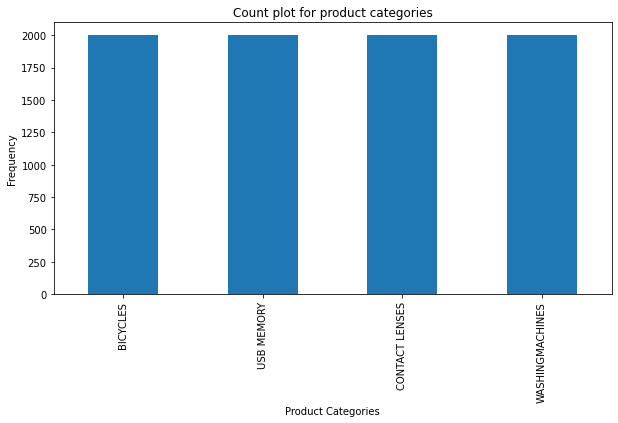

In [11]:
# count plot for product categories
df['productgroup'].value_counts().plot(kind='bar',figsize=[10,5],
                                             xlabel='Product Categories',
                                       ylabel='Frequency', title='Count plot for product categories')

<AxesSubplot:title={'center':'Count Plot for manufacturers'}, xlabel='Manufacturers', ylabel='Frequency'>

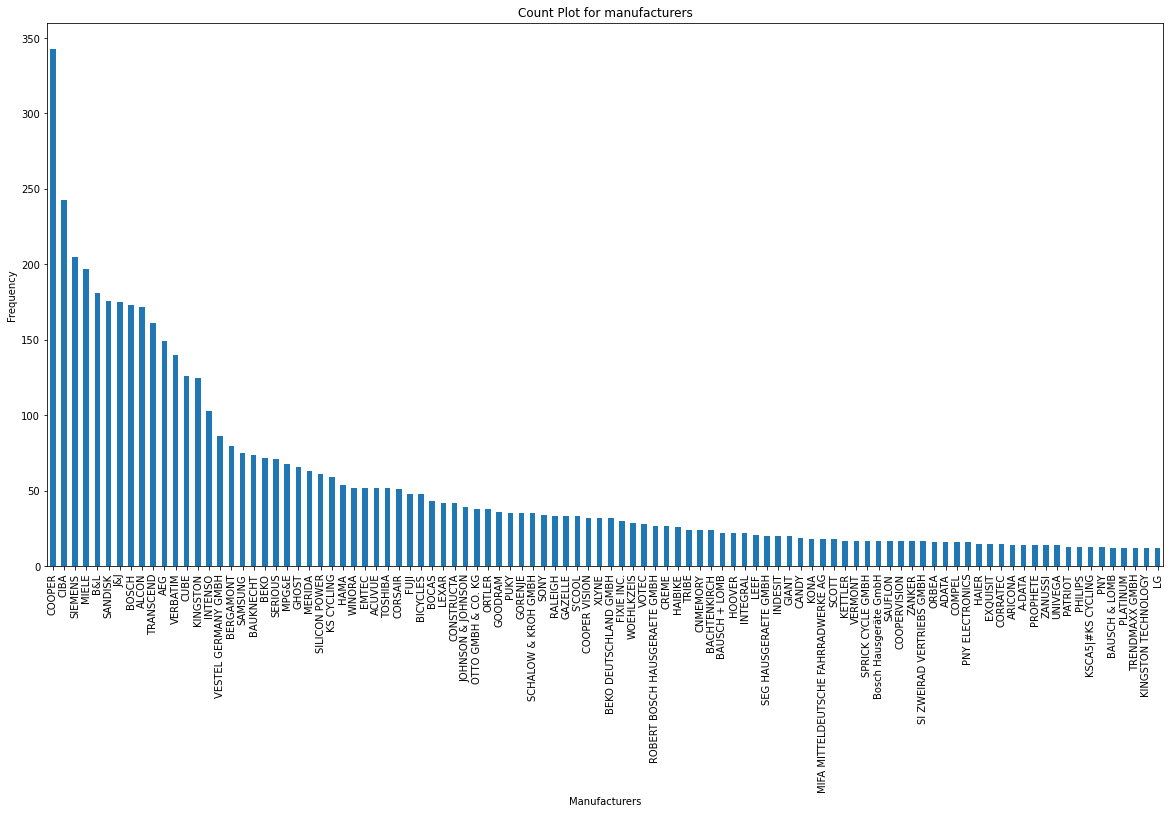

In [12]:
# Count plot for top 100 manufacturers
df['manufacturer'].value_counts()[:100].plot(kind='bar', figsize=(20,10),
                                      xlabel='Manufacturers', ylabel='Frequency',
                                             title='Count Plot for manufacturers')

In [13]:
# Average len of the 'main_text' after dropping the NaN values
np.mean(df['main_text'].dropna().apply(lambda x: len(x)))

48.759314828707176

In [14]:
# Average len of the 'add_text' after dropping the NaN values
np.mean(df['add_text'].dropna().apply(lambda x: len(x)))

24.007

In [15]:
# Inspect the length of texts and finding the nth percentile of the length of the news articles
len_main_text = df['main_text'].dropna().apply(lambda x: len(x))

In [16]:
len_main_text.describe()

count    7998.000000
mean       48.759315
std        50.671509
min         3.000000
25%        29.000000
50%        39.000000
75%        53.000000
max      1542.000000
Name: main_text, dtype: float64

In [17]:
df.groupby(by=['manufacturer'], dropna=True, as_index=False)['productgroup'].count().sort_values(by='productgroup',
                                                                                                 ascending=False)

,manufacturer,productgroup
166,COOPER,343
133,CIBA,243
514,SIEMENS,205
388,MIELE,197
58,B&L,181
...,...,...
278,HEAD,1
271,HAMA GMBH & CO. KG,1
270,HAMA GMBH & CO,1
267,HAIER DEUTSCHLAND GMBH,1


Text(0.5, 0, 'Number of ocurrences')

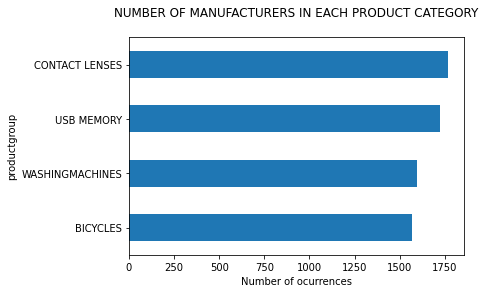

In [18]:
df.groupby('productgroup').manufacturer.count().sort_values().plot.barh(
    ylim=0, title= 'NUMBER OF MANUFACTURERS IN EACH PRODUCT CATEGORY\n')

plt.xlabel('Number of ocurrences', fontsize = 10)